The Anchored Volume Weighted Average Price (Anchored VWAP) is a trading indicator that provides the average price of a security from a specific starting point (the “anchor”), factoring in price and volume. It's used to confirm trends and identify areas of support and resistance on the chart

c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


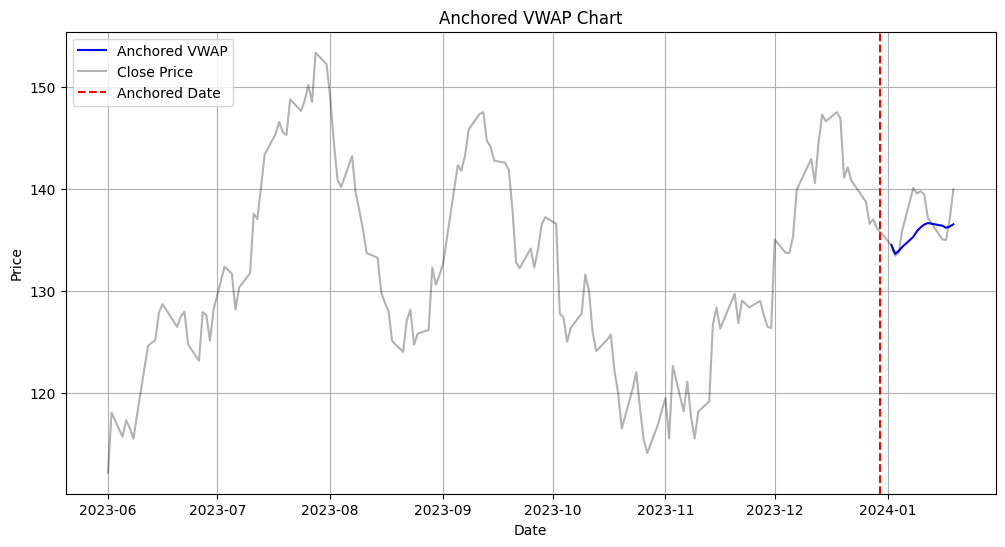

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt

# set anchor date
anchored_date = pd.to_datetime('2023-12-30')

data = yf.download("ABNB", start="2023-06-01", end="2024-01-20")
df = pd.DataFrame(data)
df1 = df.ta.vwap(anchor="D")
df14 = pd.concat([df, df1], axis=1)

# I create a column 'typical_price', it should be identical with 'VWAP_D'
df14['typical_price'] = (df14['High'] + df14['Low'] + df14['Close']) / 3
tpp_d = ((df14['High'] + df14['Low'] + df14['Close']) * df14['Volume']) / 3

df14['anchored_VWAP'] = tpp_d.where(df14.index >= anchored_date).groupby(df14.index >= anchored_date).cumsum() / df14[
    'Volume'].where(df14.index >= anchored_date).groupby(df14.index >= anchored_date).cumsum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df14.index, df14['anchored_VWAP'], label='Anchored VWAP', color='blue')
plt.plot(df14.index, df14['Close'], label='Close Price', color='black', alpha=0.3)

plt.axvline(anchored_date, color='red', linestyle='--', label='Anchored Date')

plt.title('Anchored VWAP Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
